### Testing VisionPatchDataModule.py

#### Test with Raw Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 40]

In [8]:
import radio as rio
from radio.data.datamodules import BrainAgingPredictionDataModule
from radio.data.datautils import get_first_batch
from radio.data.datavisualization import plot_batch

#### Test with Raw Data

In [9]:
data = rio.data.BrainAgingPredictionPatchDataModule(
    root='/media/cerebro/Workspaces/Students/Eduardo_Diniz/Studies',
    data_dir='processed_data',
    step='step01_structural_processing',
    use_augmentation=False,
    use_preprocessing=False,
    batch_size=32,
    intensities=["T1", "FLAIR"],
    labels=[],
    patch_size=(96, 96, 1),
    queue_max_length=300,
    samples_per_volume=10,
)

DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `dims` was deprecated in v1.5 and will be removed in v1.7.


In [10]:
data.prepare_data()
data.setup(stage='fit')

DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.


In [11]:
print(f"Training: {data.size_train} patches.")
print(f"Validation: {data.size_val} patches.")

Training: 4960 patches.
Validation: 1230 patches.


#### Get a Train and a Test Batch

In [12]:
train_dataloader = data.train_dataloader()
val_dataloader = data.val_dataloader()

In [13]:
# Takes a long time if resampling is required.
# Preprocessing beforehand is therefore recommended to speed up training.
train_batch = get_first_batch(train_dataloader)
val_batch = get_first_batch(val_dataloader)

In [14]:
print(f"Batch keys: {train_batch.keys()}")
print(f"FLAIR shape: {train_batch['FLAIR']['data'].shape}")
print(f"FLAIR keys: {train_batch['FLAIR'].keys()}")
print(f"Subject IDs: {train_batch['subj_id']}")
print(f"Scan IDs: {train_batch['scan_id']}")
print(f"Location Shape: {train_batch['location'].shape}")

Batch keys: dict_keys(['subj_id', 'scan_id', 'T1', 'FLAIR', 'location'])
FLAIR shape: torch.Size([32, 1, 96, 96, 1])
FLAIR keys: dict_keys(['data', 'affine', 'path', 'stem', 'type'])
Subject IDs: ['ABD_GJ_0138', 'ABD_AJ_0088', 'ABD_SW_0174', 'ABD_AJ_0016', 'ABD_AJ_0152', 'ABD_SS_0090', 'ABD_AJ_0016', 'ABD_IH_0030', 'ABD_AJ_0198', 'ABD_SS_0091', 'ABD_SS_0079', 'ABD_SW_0123', 'ABD_AJ_0088', 'ABD_SW_0174', 'ABD_SW_0174', 'ABD_BS_0012', 'ABD_IH_0104', 'ABD_AJ_0243', 'ABD_SS_0036', 'ABD_SS_0004', 'ABD_SS_0004', 'ABD_BS_0016', 'ABD_SS_0090', 'ABD_AJ_0085', 'ABD_SS_0036', 'ABD_SW_0123', 'ABD_IH_0030', 'ABD_AJ_0075', 'ABD_AJ_0184', 'ABD_GJ_0138', 'ABD_SW_0061', 'ABD_SW_0061']
Scan IDs: ['scan001', 'scan002', 'scan001', 'scan002', 'scan002', 'scan001', 'scan002', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan002', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'sca

#### Plot Example Samples from Batches

Subject: 1


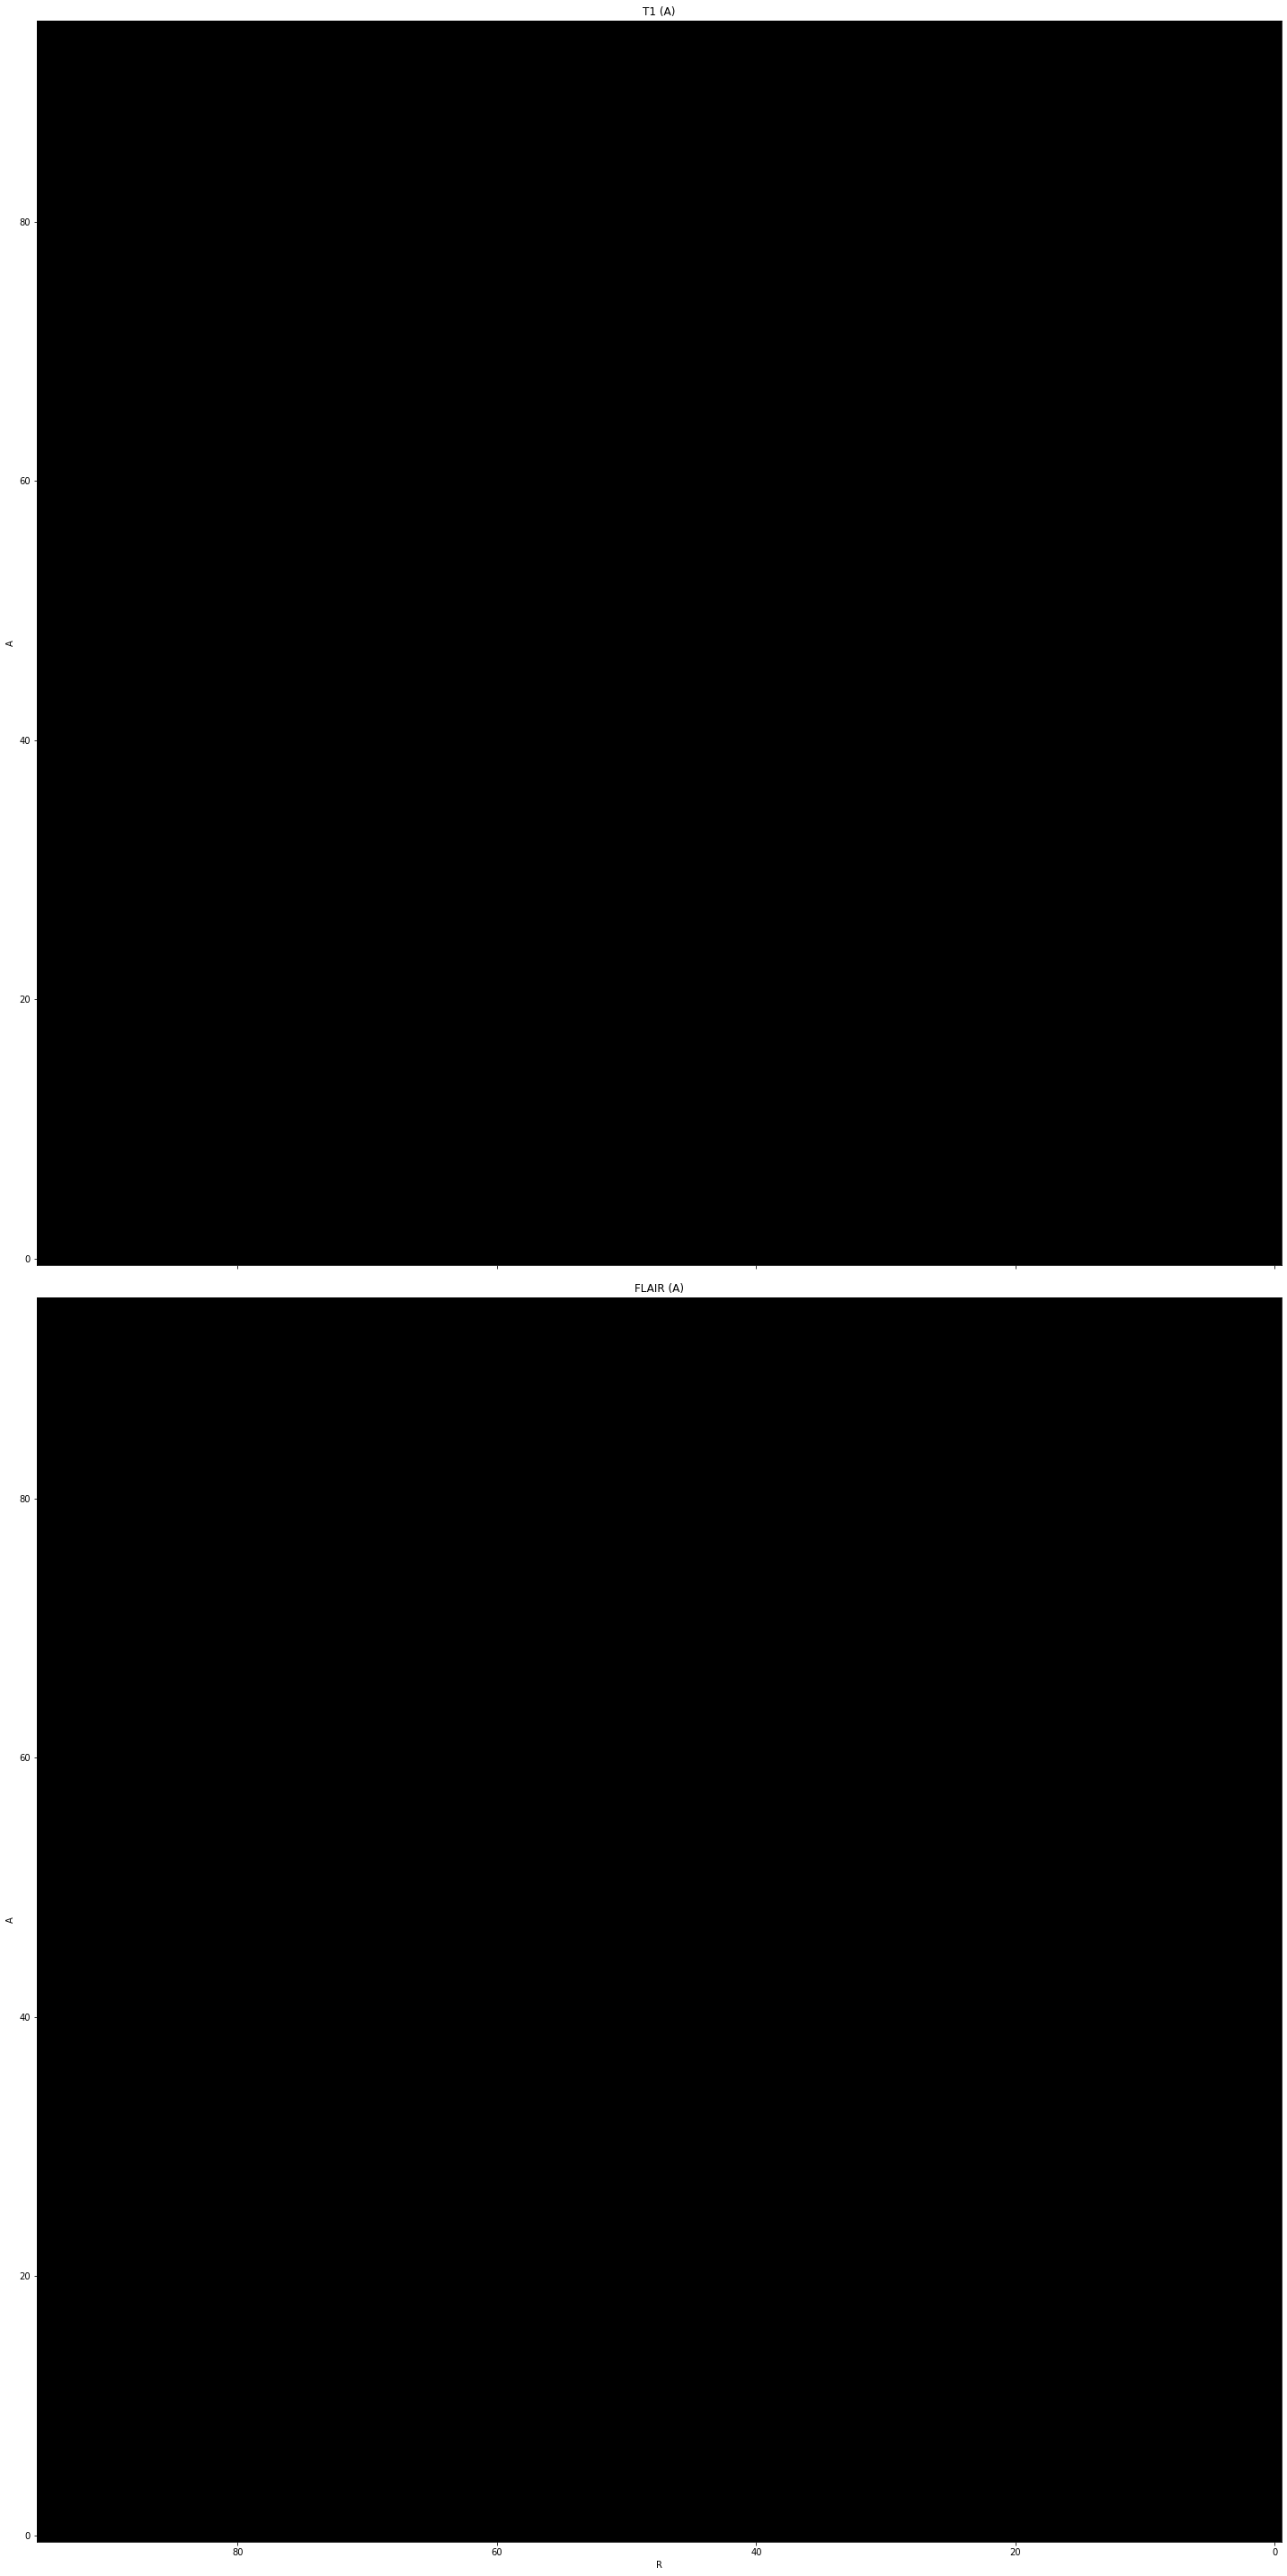



Subject: 2


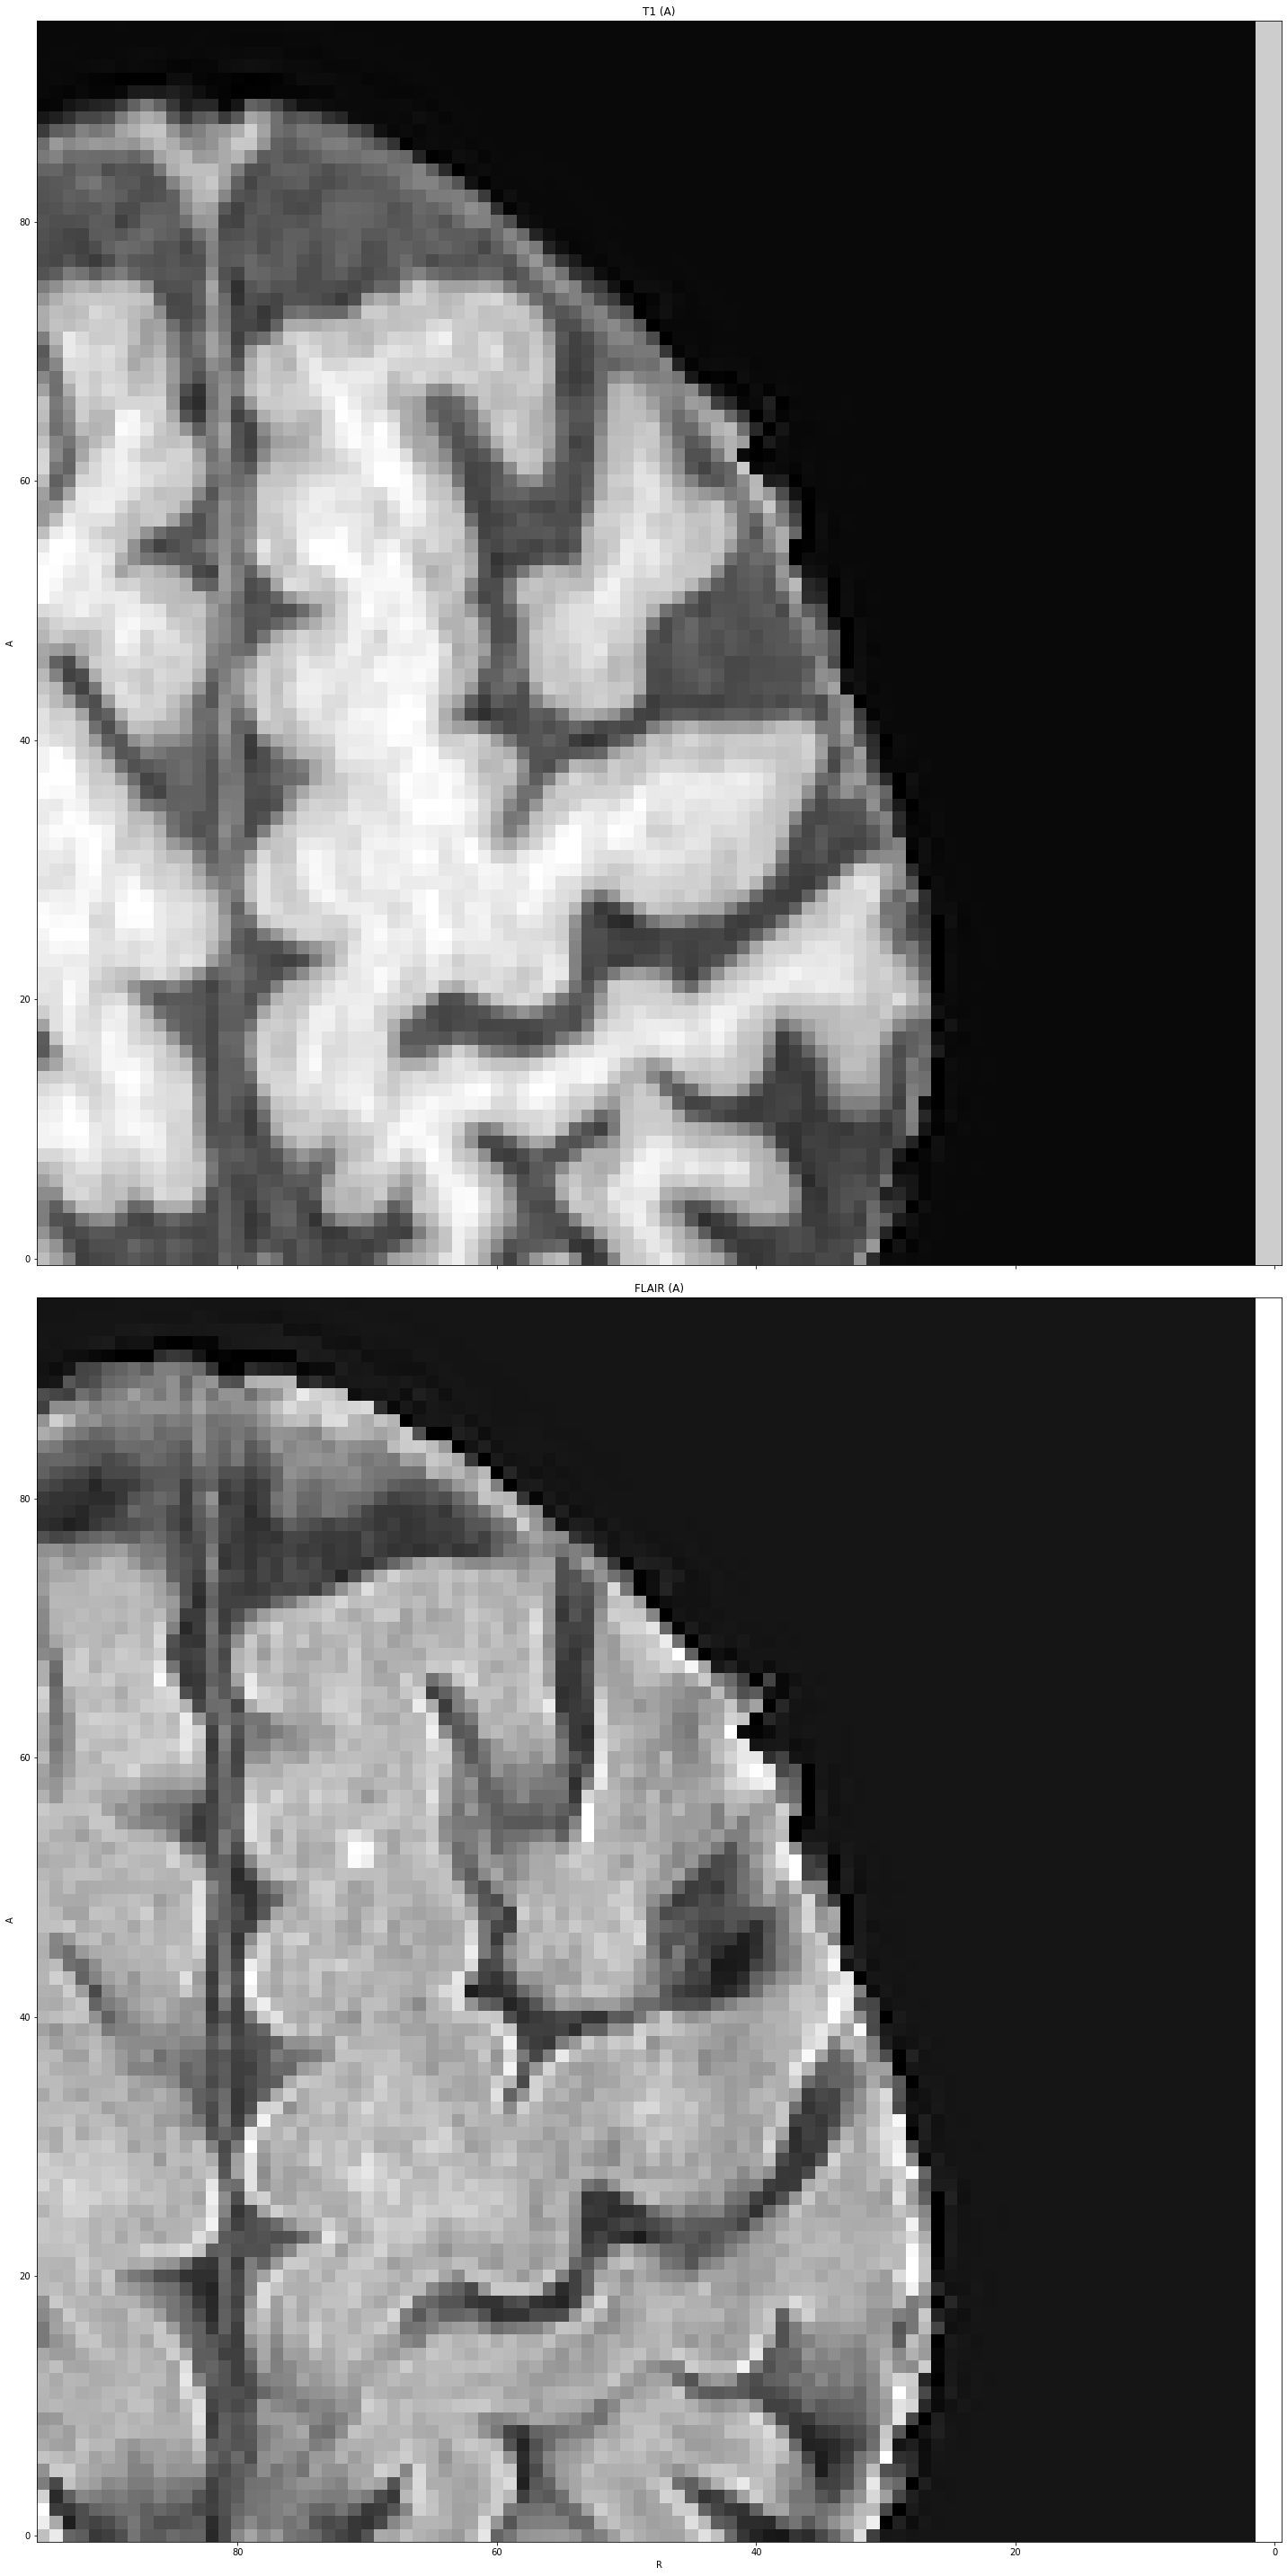



Subject: 3


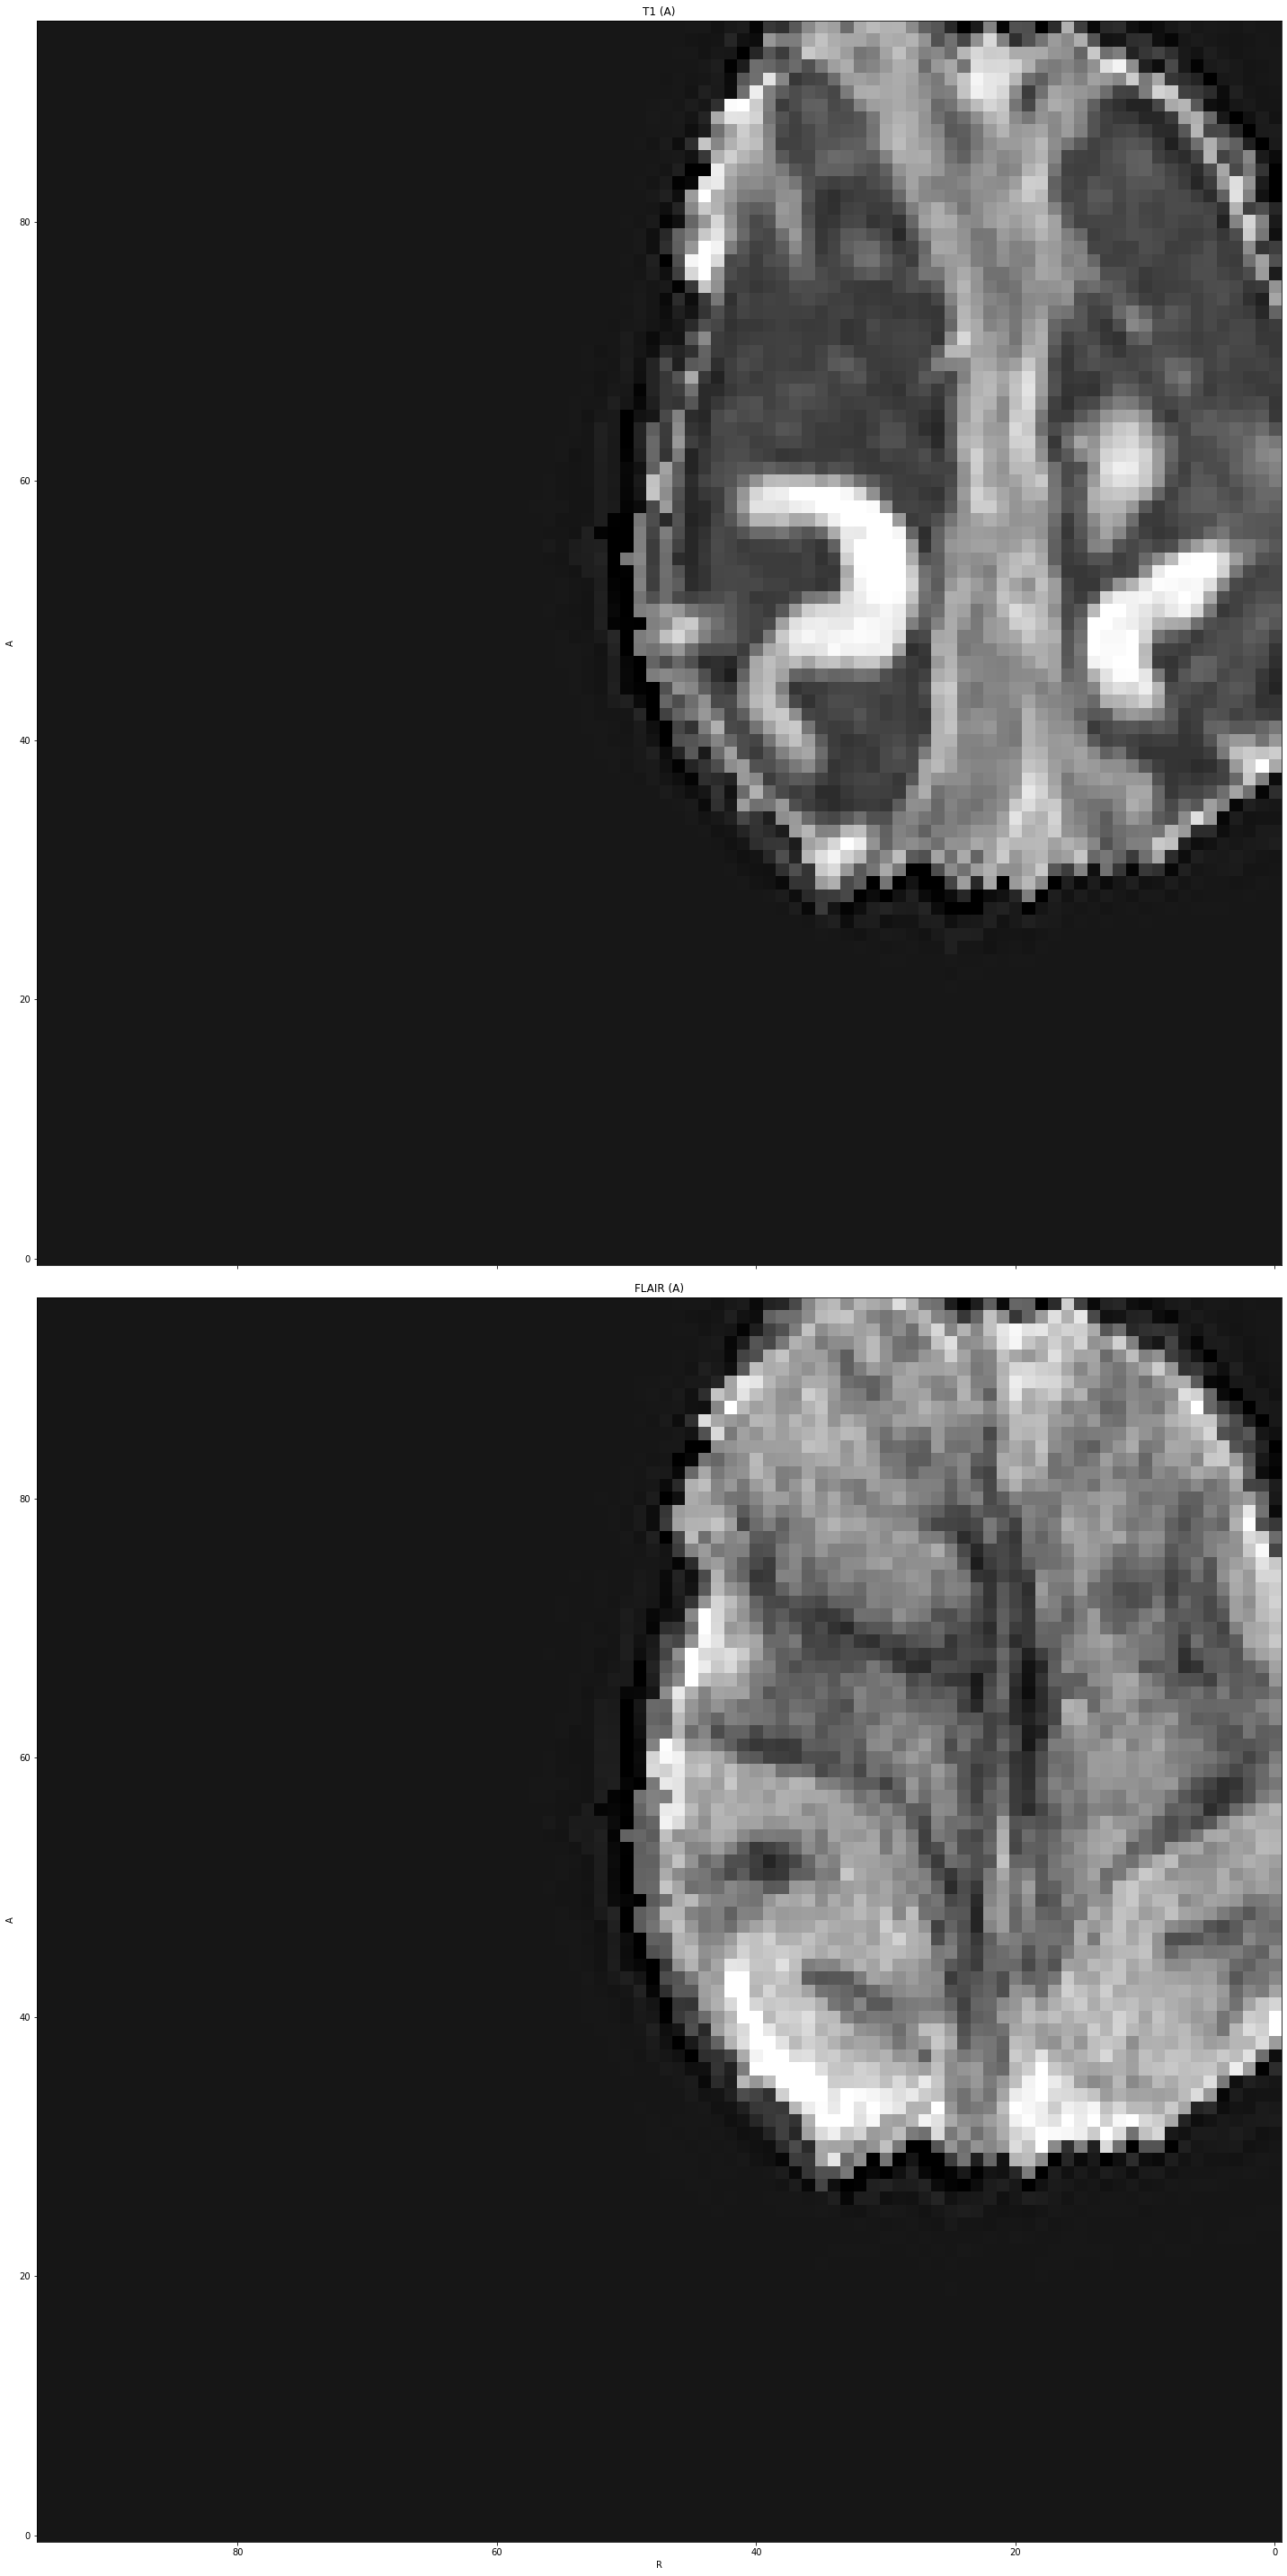



Subject: 4


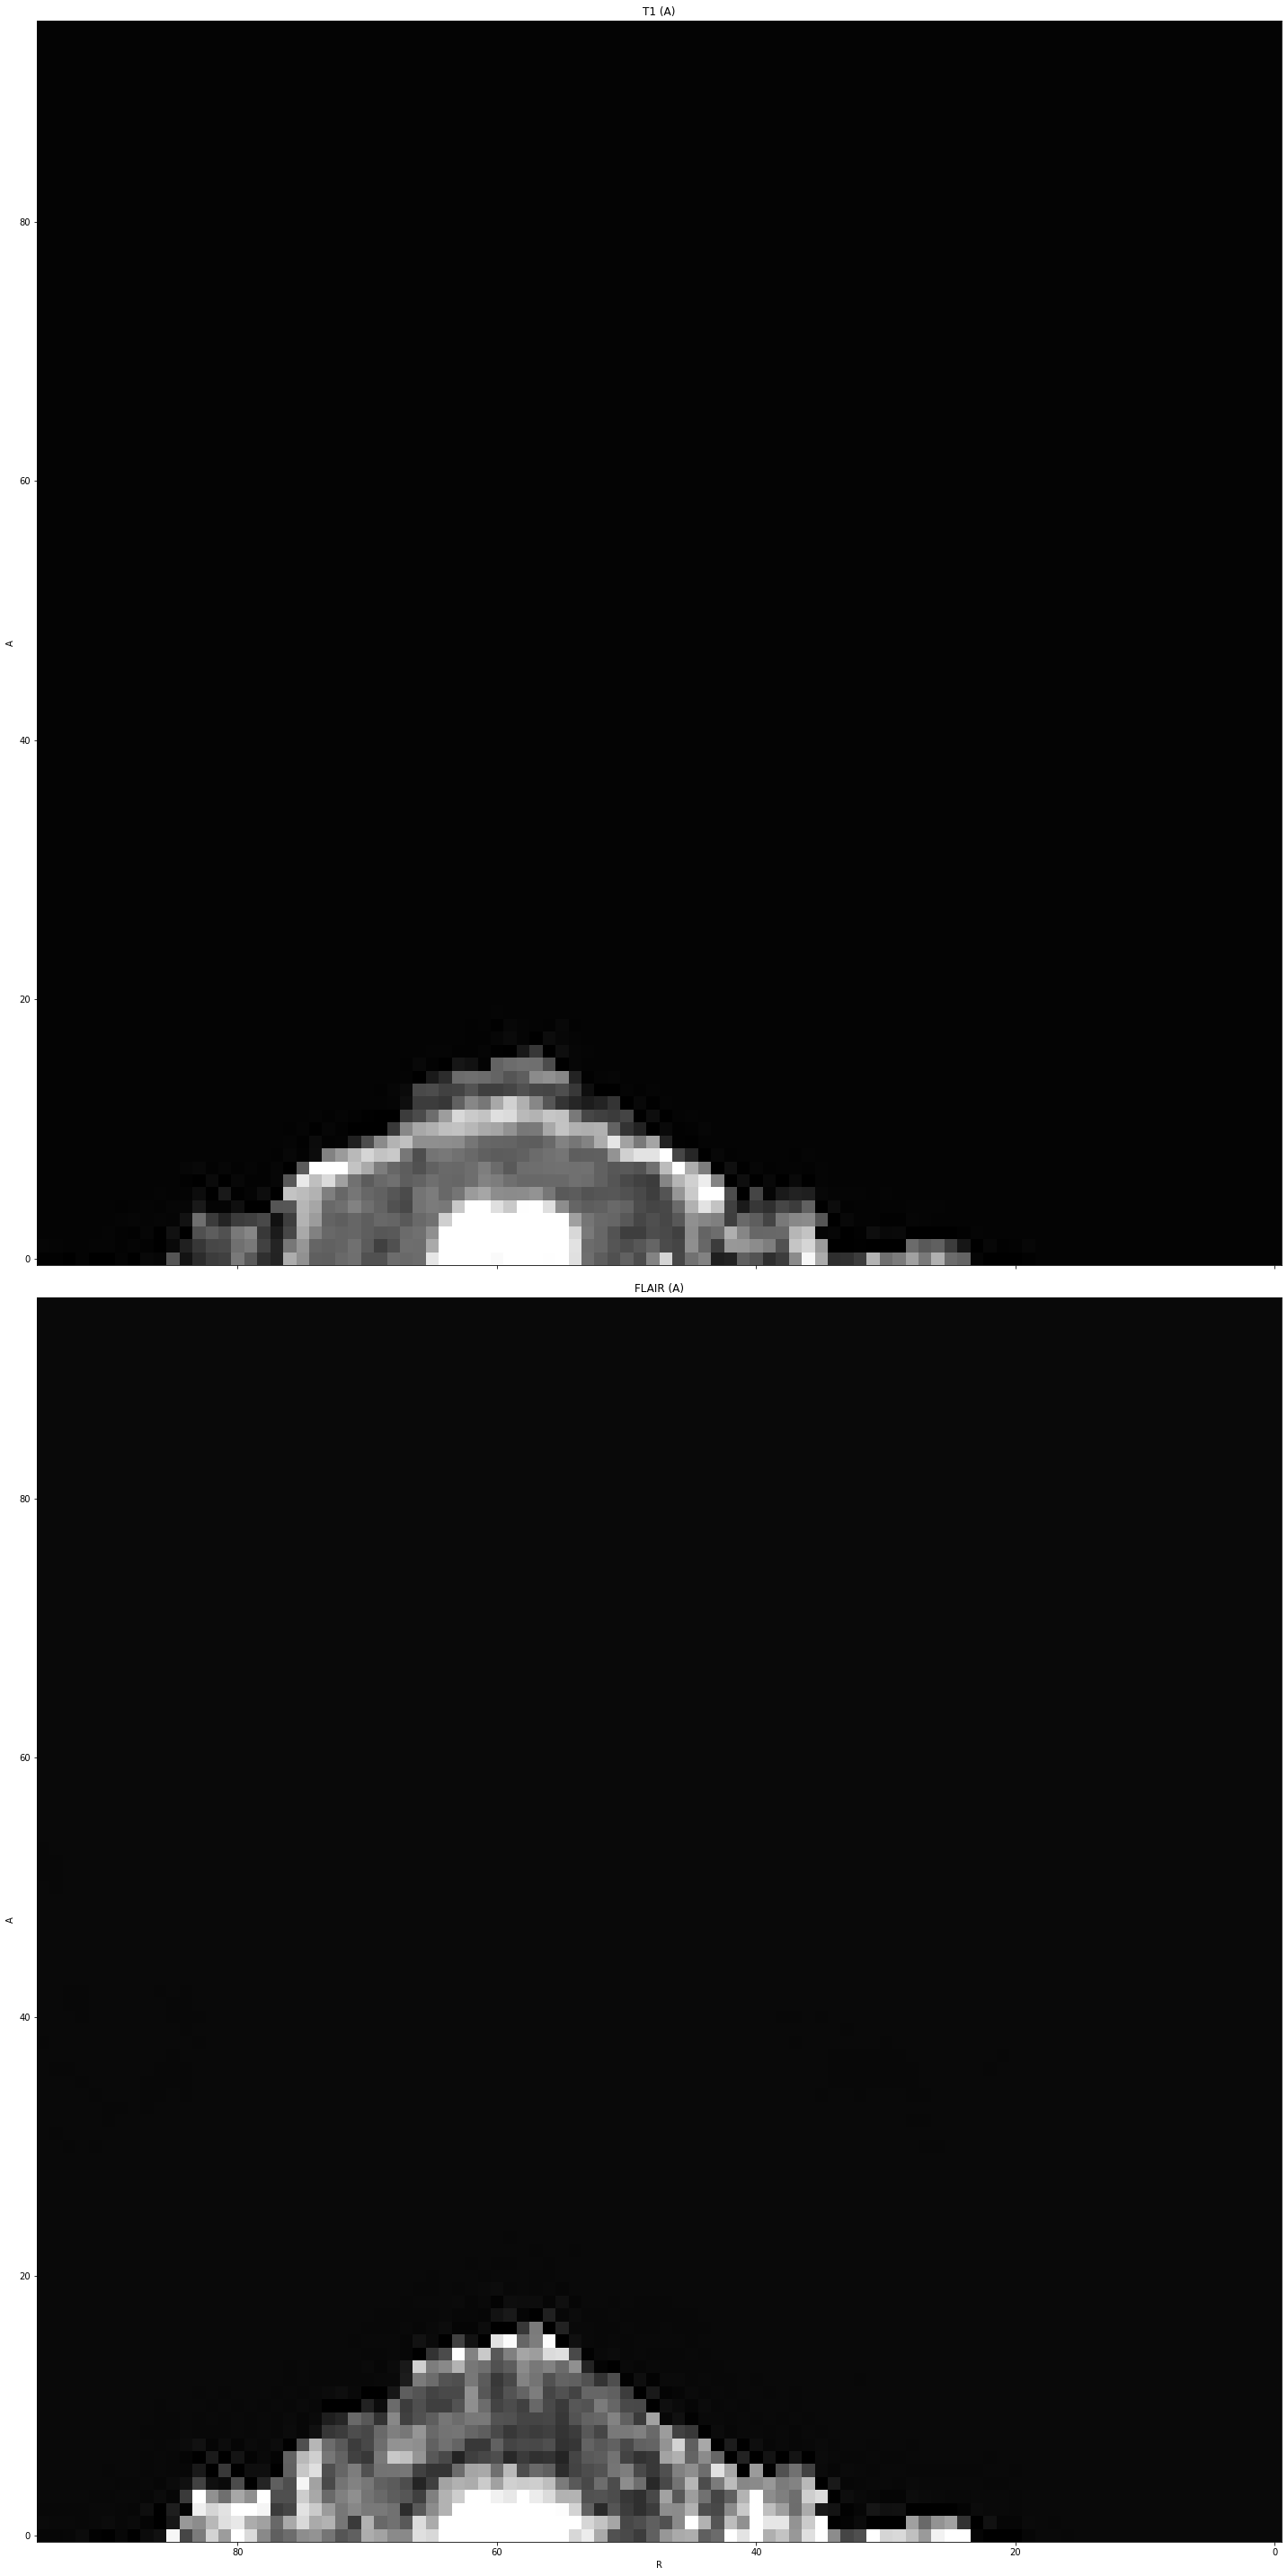



Subject: 5


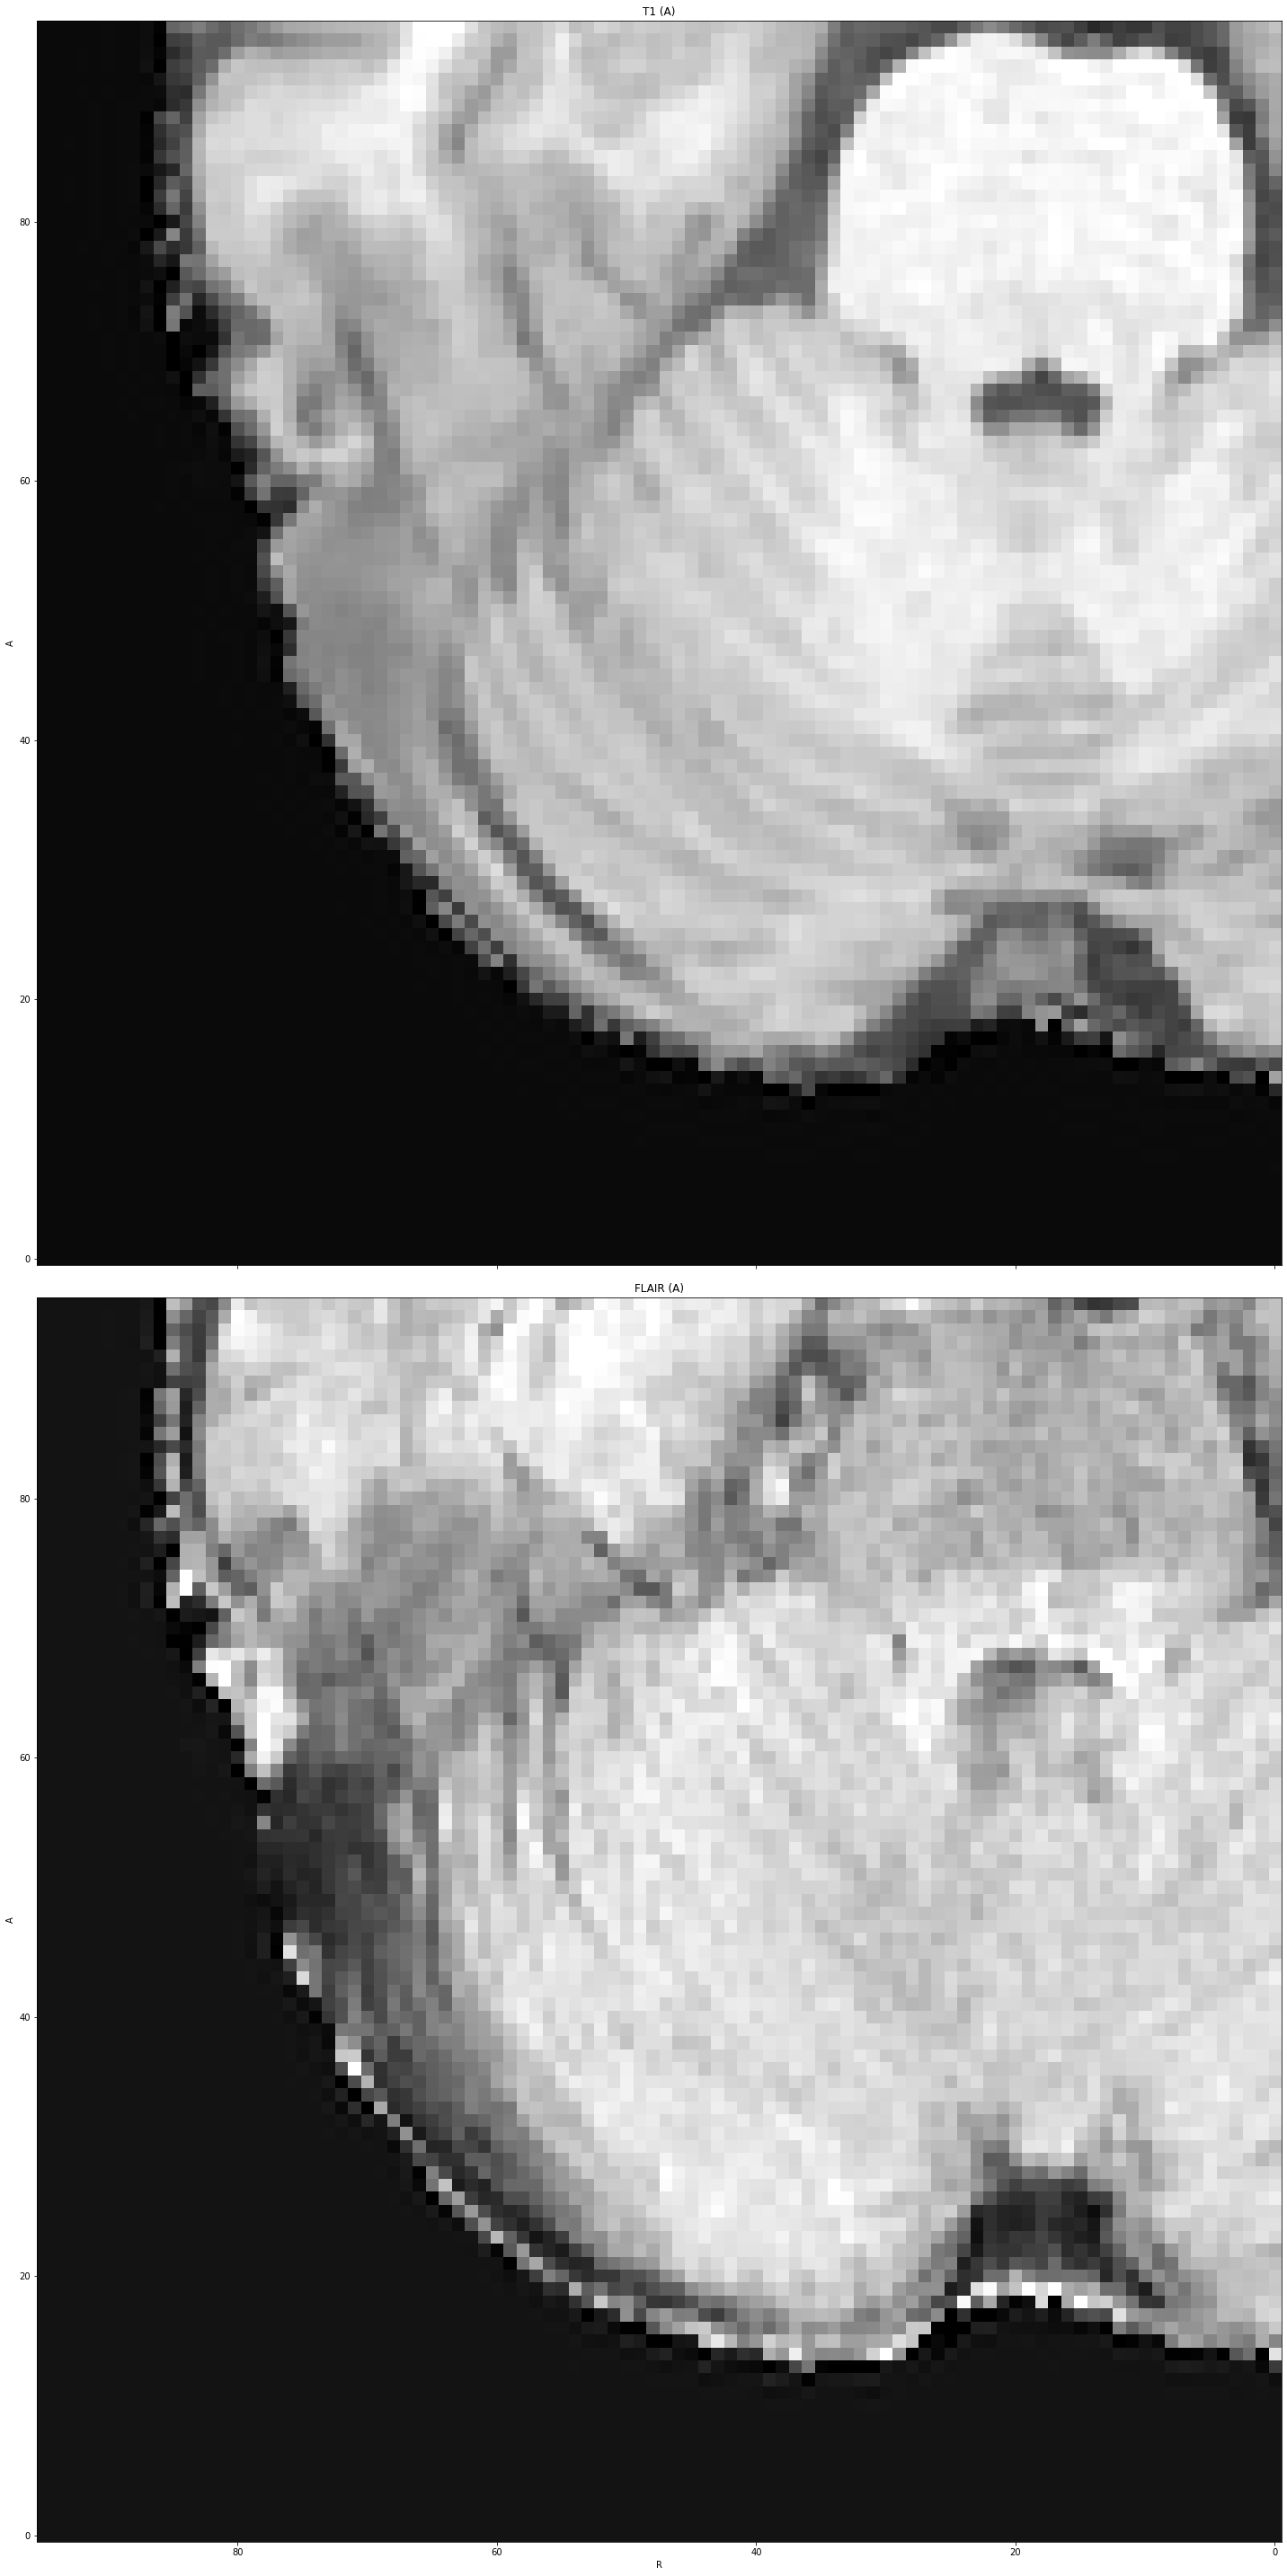

In [29]:
plot_batch(train_batch)